In [11]:
import numpy as np
import matplotlib.pylab as pl

In [12]:
##### SYNTHETIC DATASET 1 #####

# Generate data
    #   3 classes: X, Y, Z
    #   Discriminative behavior for the first two components s.t. these components in
    #       X centers around (-5,0) and (5,0)
    #       Y centers around (-3,3) and (3,-3)
    #       Z centers around (-3,-3) and (3,3)
    #   using normal (Gaussian) distribution with standard deviation 0.5
    #   data points dimension is d=10

np.random.seed(2)
# Training datasets
#   30 many X data points, 40 many Y data points, 30 many Z data points
TR_X1 = np.hstack((np.random.normal(-5, 0.5, (15, 1)), np.random.normal(0, 0.5, (15, 1))))
TR_X2 = np.hstack((np.random.normal(5, 0.5, (15, 1)), np.random.normal(0, 0.5, (15, 1))))
TR_X = np.vstack((TR_X1, TR_X2))

TR_Y1 = np.hstack((np.random.normal(-3, 0.5, (20, 1)), np.random.normal(3, 0.5, (20, 1))))
TR_Y2 = np.hstack((np.random.normal(3, 0.5, (20, 1)), np.random.normal(-3, 0.5, (20, 1))))
TR_Y = np.vstack((TR_Y1, TR_Y2))

TR_Z1 = np.hstack((np.random.normal(-3, 0.5, (15, 1)), np.random.normal(-3, 0.5, (15, 1))))
TR_Z2 = np.hstack((np.random.normal(3, 0.5, (15, 1)), np.random.normal(3, 0.5, (15, 1))))
TR_Z = np.vstack((TR_Z1, TR_Z2))

TR = np.vstack((TR_X, TR_Y, TR_Z))
TR = np.hstack((TR, np.random.randn(100, 8)))
TR_L = np.concatenate((np.ones(30) * 1,np.ones(40) * 2,np.ones(30) * 3))

# Testing datasets
#   1500 many X data points, 2000 many Y data points, 1500 many Z data points
TST_X1 = np.hstack((np.random.normal(-5, 0.5, (750, 1)), np.random.normal(0, 0.5, (750, 1))))
TST_X2 = np.hstack((np.random.normal(5, 0.5, (750, 1)), np.random.normal(0, 0.5, (750, 1))))
TST_X = np.vstack((TST_X1, TST_X2))

TST_Y1 = np.hstack((np.random.normal(-3, 0.5, (1000, 1)), np.random.normal(3, 0.5, (1000, 1))))
TST_Y2 = np.hstack((np.random.normal(3, 0.5, (1000, 1)), np.random.normal(-3, 0.5, (1000, 1))))
TST_Y = np.vstack((TST_Y1, TST_Y2))

TST_Z1 = np.hstack((np.random.normal(-3, 0.5, (750, 1)), np.random.normal(-3, 0.5, (750, 1))))
TST_Z2 = np.hstack((np.random.normal(3, 0.5, (750, 1)), np.random.normal(3, 0.5, (750, 1))))
TST_Z = np.vstack((TST_Z1, TST_Z2))

TST = np.vstack((TST_X, TST_Y, TST_Z))
TST = np.hstack ((TST, np.random.randn(5000, 8)))
TST_L = np.concatenate((np.ones(1500) * 1, np.ones(2000) * 2, np.ones(1500) * 3))

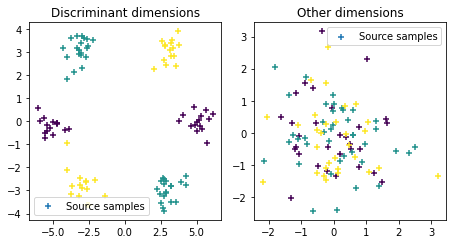

In [13]:
## plot training data
import matplotlib.pylab as pl
%matplotlib inline

pl.figure(1, figsize=(6.4, 3.5))

pl.subplot(1, 2, 1)
pl.scatter(TR[:, 0], TR[:, 1], c=TR_L, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Discriminant dimensions')

pl.subplot(1, 2, 2)
pl.scatter(TR[:, 2], TR[:, 3], c=TR_L, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Other dimensions')
pl.tight_layout()

In [18]:
## Classification
## Radom data generation for each trial
## Total 100 trials

import WDAnepv as WDAnepv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

p = 2 # subspace dimension
d = 10 # dimension
k = 10 # Sinkhorn iteration number
reg = 0.1 # regularization parameter
n_iter = 100
acclist_nepv = []

for i in range(n_iter):
    # Generate data
    #   3 classes: X, Y, Z
    #   Discriminative behavior for the first two components s.t. these components in
    #       X centers around (-5,0) and (5,0)
    #       Y centers around (-3,3) and (3,-3)
    #       Z centers around (-3,-3) and (3,3)
    #   using normal (Gaussian) distribution with standard deviation 0.5
    #   data points dimension is d=10
    
    # Training datasets
    #   30 many X data points, 40 many Y data points, 30 many Z data points
    TR_X1 = np.hstack((np.random.normal(-5, 0.5, (15, 1)), np.random.normal(0, 0.5, (15, 1))))
    TR_X2 = np.hstack((np.random.normal(5, 0.5, (15, 1)), np.random.normal(0, 0.5, (15, 1))))
    TR_X = np.vstack((TR_X1, TR_X2))

    TR_Y1 = np.hstack((np.random.normal(-3, 0.5, (20, 1)), np.random.normal(3, 0.5, (20, 1))))
    TR_Y2 = np.hstack((np.random.normal(3, 0.5, (20, 1)), np.random.normal(-3, 0.5, (20, 1))))
    TR_Y = np.vstack((TR_Y1, TR_Y2))

    TR_Z1 = np.hstack((np.random.normal(-3, 0.5, (15, 1)), np.random.normal(-3, 0.5, (15, 1))))
    TR_Z2 = np.hstack((np.random.normal(3, 0.5, (15, 1)), np.random.normal(3, 0.5, (15, 1))))
    TR_Z = np.vstack((TR_Z1, TR_Z2))

    TR = np.vstack((TR_X, TR_Y, TR_Z))
    TR = np.hstack((TR, np.random.randn(100, 8)))
    TR_L = np.concatenate((np.ones(30) * 1,np.ones(40) * 2,np.ones(30) * 3))

    # Testing datasets
    #   1500 many X data points, 2000 many Y data points, 1500 many Z data points
    TST_X1 = np.hstack((np.random.normal(-5, 0.5, (750, 1)), np.random.normal(0, 0.5, (750, 1))))
    TST_X2 = np.hstack((np.random.normal(5, 0.5, (750, 1)), np.random.normal(0, 0.5, (750, 1))))
    TST_X = np.vstack((TST_X1, TST_X2))

    TST_Y1 = np.hstack((np.random.normal(-3, 0.5, (1000, 1)), np.random.normal(3, 0.5, (1000, 1))))
    TST_Y2 = np.hstack((np.random.normal(3, 0.5, (1000, 1)), np.random.normal(-3, 0.5, (1000, 1))))
    TST_Y = np.vstack((TST_Y1, TST_Y2))

    TST_Z1 = np.hstack((np.random.normal(-3, 0.5, (750, 1)), np.random.normal(-3, 0.5, (750, 1))))
    TST_Z2 = np.hstack((np.random.normal(3, 0.5, (750, 1)), np.random.normal(3, 0.5, (750, 1))))
    TST_Z = np.vstack((TST_Z1, TST_Z2))

    TST = np.vstack((TST_X, TST_Y, TST_Z))
    TST = np.hstack ((TST, np.random.randn(5000, 8)))
    TST_L = np.concatenate((np.ones(1500) * 1, np.ones(2000) * 2, np.ones(1500) * 3))
    
    # Wasserstein Discriminant Analysis
    # PCA projection as initial projection
    pca = PCA(n_components=2)
    P0 = pca.fit_transform(TR.T)
    P0 /= np.sqrt(np.sum(P0**2, 0, keepdims=True))

    # Train (Solve WDA)
    P, Sub_Err, Norm_Err, WDA_Val, proj = WDAnepv.wda_nepv(TR, TR_L, 2, P0, lamb=reg, e=0, k=10, tol=1e-5, maxitr=50) # WDAnepv
    # KNN models
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(proj(TR), TR_L)
    # Test
    predicted = model.predict(proj(TST))
    acc = accuracy_score(TST_L, predicted)
    # store accuracy
    acclist_nepv.append(acc)

In [21]:
print('WDAnepv mean:', np.mean(acclist_nepv), ' std:', np.std(acclist_nepv))

WDAnepv mean: 0.9994320000000001  std: 0.0003437673631978593
